In [6]:
from welly import Project
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Loading wells using Project
wells = Project.from_las('Multiple las files/*.las')

3it [00:00,  5.20it/s]


### Well Meta Data

In [8]:
wells

Index,UWI,Data,Curves
0,ZA4423,13 curves,"ILD, CILD, GR:1, GR:2, CALI, DRHO, NPHI, RHOB, NRAT, NCNL, FCNL, SP, SN"
1,ZA4424,12 curves,"GR:1, CALI, DRHO, NPHI, RHOB, NRAT, NCNL, FCNL, SP, ILD, SFLU, GR:2"
2,ZA4425,14 curves,"SP, ILD, SFLU, GR:1, CALI:1, MSFL, GR:2, CALI:2, DRHO, NPHI, RHOB, NRAT, NCNL, FCNL"


In [9]:
wells.uwis

['ZA4423', 'ZA4424', 'ZA4425']

In [10]:
for well in wells:
    print(well)

Well(uwi: 'ZA4423', name: 'Well 01', 13 curves: ['ILD', 'CILD', 'GR:1', 'GR:2', 'CALI', 'DRHO', 'NPHI', 'RHOB', 'NRAT', 'NCNL', 'FCNL', 'SP', 'SN'])
Well(uwi: 'ZA4424', name: 'Well 02', 12 curves: ['GR:1', 'CALI', 'DRHO', 'NPHI', 'RHOB', 'NRAT', 'NCNL', 'FCNL', 'SP', 'ILD', 'SFLU', 'GR:2'])
Well(uwi: 'ZA4425', name: 'Well 03', 14 curves: ['SP', 'ILD', 'SFLU', 'GR:1', 'CALI:1', 'MSFL', 'GR:2', 'CALI:2', 'DRHO', 'NPHI', 'RHOB', 'NRAT', 'NCNL', 'FCNL'])


In [51]:
for well in wells:
    print(well.uwi)

ZA4423
ZA4424
ZA4425


### Plotting Curves from Multiple Wells

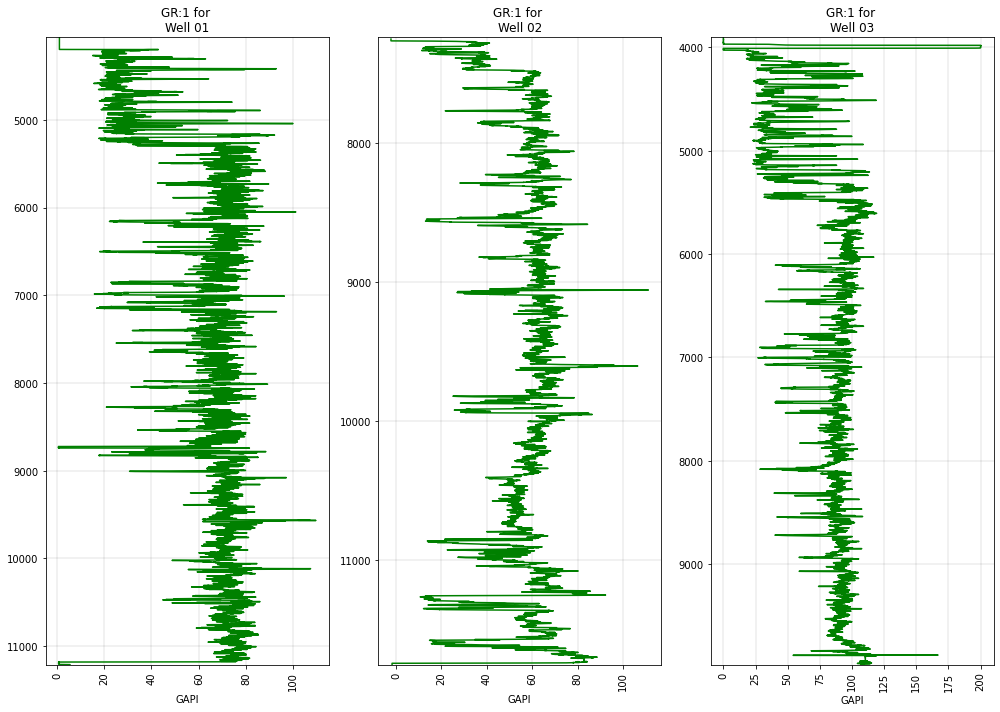

In [11]:
fig, axs = plt.subplots(figsize=(14,10), ncols=len(wells))
for ax, well in zip(axs, wells):
    gr = well.get_curve('GR:1')
    if gr is not None:
        ax =gr.plot(ax=ax, c='green')
    ax.set_title(f'GR:1 for \n{well.name}')

plt.tight_layout()
plt.show()

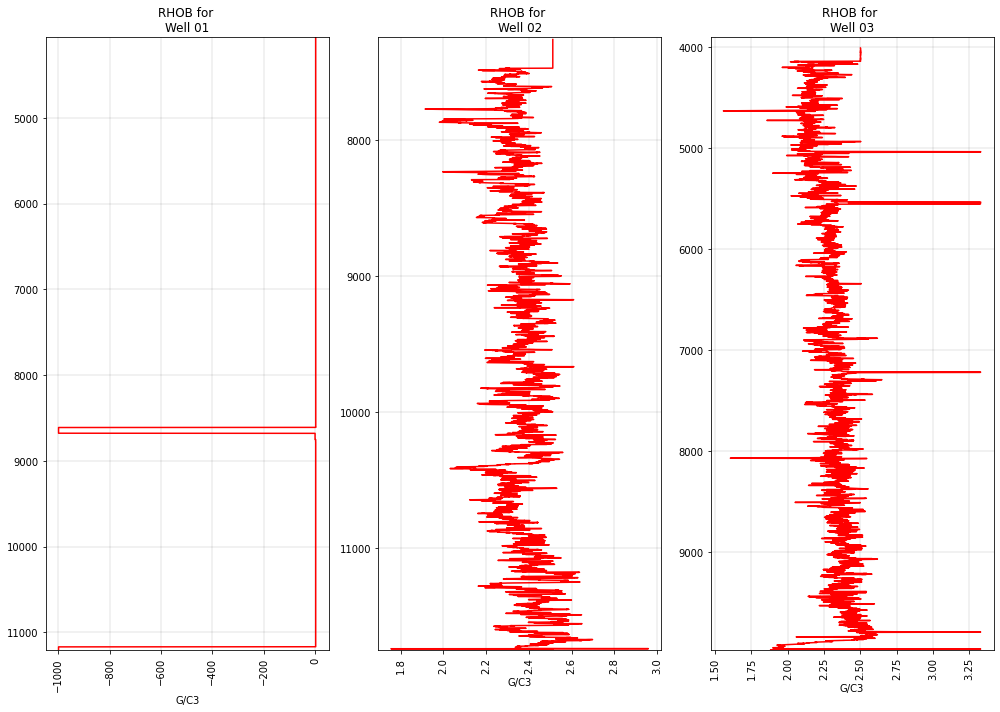

In [12]:
fig, axs = plt.subplots(figsize=(14,10), ncols=len(wells))

curve_name = 'RHOB'

for ax, well in zip(axs, wells):
    rhob = well.get_curve(curve_name)
    if rhob is not None:
        ax =rhob.plot(ax=ax, c='red')
    ax.set_title(f'RHOB for \n{well.name}')

plt.tight_layout()
plt.show()

### Well Log Data Quality

In [14]:
import welly.quality as wq
from IPython.display import HTML

In [15]:
tests = { 'Each' : [wq.no_flat,
                    wq.no_gaps,
                    wq.not_empty],
         'GR:1' : [wq.all_positive,
                    wq.all_between(0, 250),
                    wq.check_units(['API', 'GAPI'])],
         'RHOB' : [wq.all_positive,
                    wq.all_between(1.5, 3),
                    wq.check_units(['G/CC', 'g/cm3'])]}

In [16]:
data_qc_table = wells.curve_table_html(keys=['GR:1','RHOB'],tests=tests)
HTML(data_qc_table)

Idx,UWI,Data,Passing,GR:1,RHOB
,,,%,3/3 wells,3/3 wells
0,ZA4423,2/13 curves,58,GR:1⬤61.25 GAPI,RHOB⬤-12.92 G/C3
1,ZA4424,2/12 curves,67,GR:1⬤57.17 GAPI,RHOB⬤2.37 G/C3
2,ZA4425,2/14 curves,75,GR:1⬤79.39 GAPI,RHOB⬤2.31 G/C3


In [29]:
qc_dict = {}
for well in wells:
    qc_dict[well.uwi] = well.qc_table_html(tests)

In [30]:
HTML(qc_dict['ZA4423'])

Curve,Passed,Score,not_empty,no_gaps,check_units,no_flat,all_between,all_positive
ILD,3 / 3,1.000,True,True,,True,,
CILD,3 / 3,1.000,True,True,,True,,
GR:1,5 / 6,0.833,True,True,True,False,True,True
GR:2,2 / 3,0.667,True,True,,False,,
CALI,2 / 3,0.667,True,True,,False,,
DRHO,2 / 3,0.667,True,True,,False,,
NPHI,2 / 3,0.667,True,True,,False,,
RHOB,2 / 6,0.333,True,True,False,False,False,False
NRAT,2 / 3,0.667,True,True,,False,,
NCNL,2 / 3,0.667,True,True,,False,,


### Well data to Dataframe

In [36]:
data = wells.df()
data

ILD  CILD      GR:1      GR:2    CALI    DRHO     NPHI  \
UWI    DEPT                                                                  
ZA4423 4060.0  123.9000  -4.0    1.0377    1.0377 -0.7804 -0.0030  -0.0400   
       4060.5  123.9000  -4.0    1.0377    1.0377 -0.7804 -0.0030  -0.0400   
       4061.0  123.9000  -4.0    1.0377    1.0377 -0.7804 -0.0030  -0.0400   
       4061.5  123.9000  -4.0    1.0377    1.0377 -0.7804 -0.0030  -0.0400   
       4062.0  123.9000  -4.0    1.0377    1.0377 -0.7804 -0.0030  -0.0400   
...                 ...   ...       ...       ...     ...     ...      ...   
ZA4425 9969.0    2.1478   NaN  109.4000  109.4000     NaN  0.0171  30.0795   
       9970.0       NaN   NaN       NaN       NaN     NaN  0.0191  -2.8032   
       9971.0       NaN   NaN       NaN       NaN     NaN  0.0000   0.0795   
       9972.0       NaN   NaN       NaN       NaN     NaN  0.0000   0.0795   
       9973.0       NaN   NaN       NaN       NaN     NaN  0.0000   0.0795   

                 RHOB    NRAT      NCNL     FCNL       SP      SN    SFLU  \
UWI    DEPT                                                                 
ZA4423 4060.0  2.5000  0.0080    0.8580   0.8580 -30.8271 -0.0438     NaN   
       4060.5  2.5000  0.0080    0.8580   0.8580 -30.8271 -0.0438     NaN   
       4061.0  2.5000  0.0080    0.8580   0.8580 -30.8271 -0.0438     NaN   
       4061.5  2.5000  0.0080    0.8580   0.8580 -30.8271 -0.0438     NaN   
       4062.0  2.5000  0.0080    0.8580   0.8580 -30.8271 -0.0438     NaN   
...               ...     ...       ...      ...      ...     ...     ...   
ZA4425 9969.0  1.9162  3.0853  215.4507  54.6308 -76.1954     NaN  1.6904   
       9970.0  1.8812  0.0000   79.8283  47.8020      NaN     NaN     NaN   
       9971.0  2.5000  0.0000    0.0000   0.4268      NaN     NaN     NaN   
       9972.0  2.5000  0.0000    0.0000   0.4268      NaN     NaN     NaN   
       9973.0  2.5000  0.0000    0.0000   0.4268      NaN     NaN     NaN   

               CALI:1    MSFL  CALI:2  
UWI    DEPT                            
ZA4423 4060.0     NaN     NaN     NaN  
       4060.5     NaN     NaN     NaN  
       4061.0     NaN     NaN     NaN  
       4061.5     NaN     NaN     NaN  
       4062.0     NaN     NaN     NaN  
...               ...     ...     ...  
ZA4425 9969.0    3.55  1.7701    3.55  
       9970.0     NaN     NaN     NaN  
       9971.0     NaN     NaN     NaN  
       9972.0     NaN     NaN     NaN  
       9973.0     NaN     NaN     NaN  

[29393 rows x 17 columns]

In [34]:
data.loc['ZA4423']

,ILD,CILD,GR:1,GR:2,CALI,DRHO,NPHI,RHOB,NRAT,NCNL,FCNL,SP,SN,SFLU,CALI:1,MSFL,CALI:2
DEPT,,,,,,,,,,,,,,,,,
4060.0,123.9,-4.00,1.0377,1.0377,-0.7804,-0.003,-0.04,2.5,0.008,0.858,0.858,-30.8271,-0.0438,NaN,NaN,NaN,NaN
4060.5,123.9,-4.00,1.0377,1.0377,-0.7804,-0.003,-0.04,2.5,0.008,0.858,0.858,-30.8271,-0.0438,NaN,NaN,NaN,NaN
4061.0,123.9,-4.00,1.0377,1.0377,-0.7804,-0.003,-0.04,2.5,0.008,0.858,0.858,-30.8271,-0.0438,NaN,NaN,NaN,NaN
4061.5,123.9,-4.00,1.0377,1.0377,-0.7804,-0.003,-0.04,2.5,0.008,0.858,0.858,-30.8271,-0.0438,NaN,NaN,NaN,NaN
4062.0,123.9,-4.00,1.0377,1.0377,-0.7804,-0.003,-0.04,2.5,0.008,0.858,0.858,-30.8271,-0.0438,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11208.0,2.3,543.75,5.5308,5.5308,-999.0000,-999.000,-999.00,-999.0,-999.000,-999.000,-999.000,-45.8571,2.3571,NaN,NaN,NaN,NaN
11208.5,2.3,543.75,5.5308,5.5308,-999.0000,-999.000,-999.00,-999.0,-999.000,-999.000,-999.000,-45.8571,2.3571,NaN,NaN,NaN,NaN
11209.0,2.3,543.75,5.5308,5.5308,-999.0000,-999.000,-999.00,-999.0,-999.000,-999.000,-999.000,-45.8571,2.3571,NaN,NaN,NaN,NaN
